# Постановка задачи

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт ли клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Примечание: такого банка в реальности не существует. Данные о его клиентах вымышлены (синтезированы).

Данная задача была предложена в рамках курса Университета Национальной Технологической Инициативы (НТИ) 2035

# Подключение библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных

In [3]:
df = pd.read_csv("Churn_Modelling.csv", sep=";")


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Описание данных

Признаки:

- RowNumber – индекс строки в данных
- CustomerId – уникальный идентификатор клиента
- Surname – фамилия
- CreditScore – кредитный рейтинг
- Geography – страна проживания
- Gender – пол
- Age – возраст
- Tenure – количество недвижимости у клиента
- Balance – баланс на счёте
- NumOfProducts -количество продуктов банка, используемых клиентом
- HasCrCard – наличие кредитной карты
- IsActiveMember – активность клиента
- EstimatedSalary – предполагаемая зарплата

Целевой (искомый) признак:

- Exited – факт ухода клиента

In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
 df.describe(include="O")

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


В наборе данных содержится 10000 наблюдений и 14 признаков. Пропущенных и аномальных значений не наблюдается. 

# Разведочный анализ данных (EDA)

### Проверка на пропуски и дубликаты

In [9]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

Все записи уникальные, отсутствуют пустые значения и дубликаты.

In [19]:
df=df.drop(["RowNumber","CustomerId"],axis=1)


In [20]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


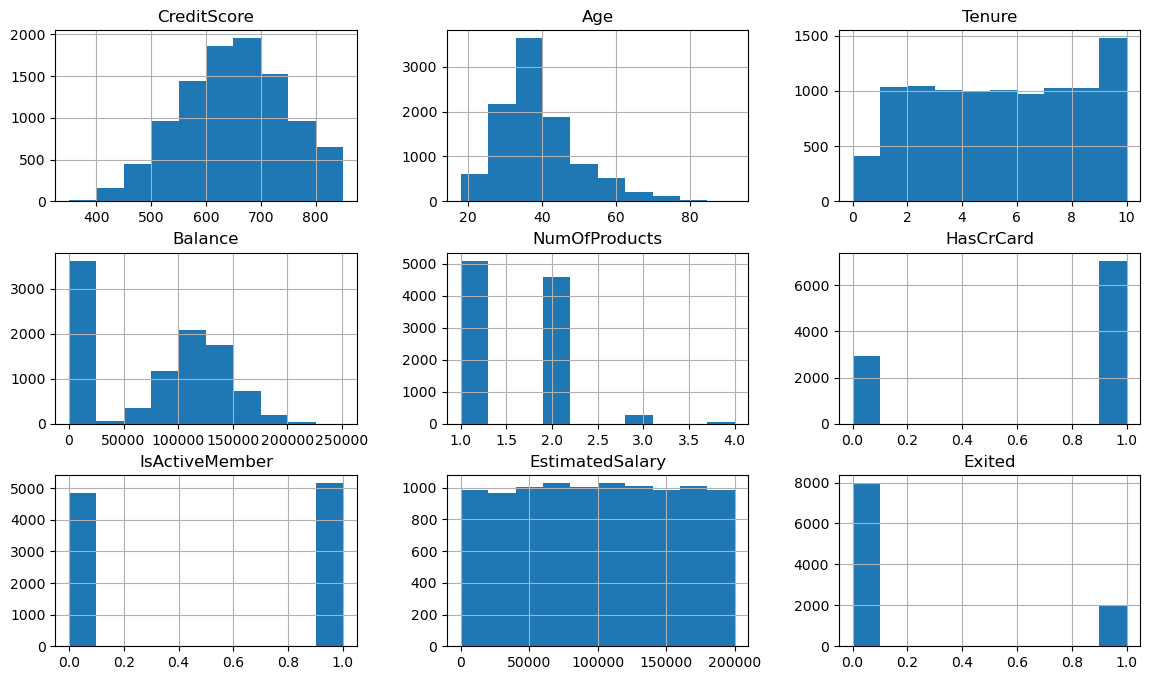

In [32]:
df.hist(figsize=(14,8));

In [33]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2a72d87a710>,
 [Text(-0.004838081895660122, 1.0999893603865316, 'France'),
  Text(-0.7687237427710687, -0.7868060798570637, 'Germany'),
  Text(0.7834174930581567, -0.7721768136705952, 'Spain')])

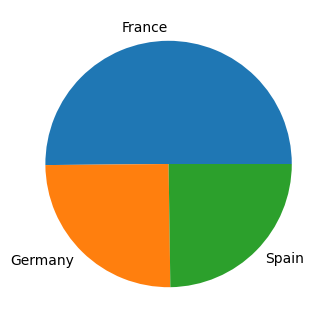

In [35]:
plt.figure(figsize=(4,4))
plt.pie(df["Geography"].value_counts(), labels=df["Geography"].value_counts().index)

In [37]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [38]:
df["Exited"].value_counts(normalize= True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

<Axes: xlabel='Exited', ylabel='count'>

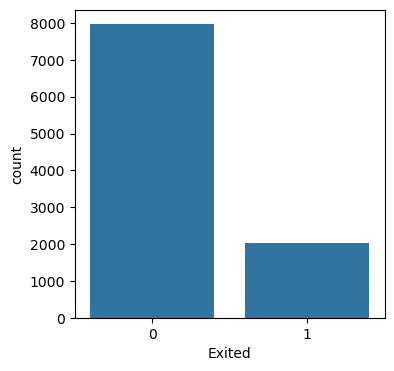

In [50]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x="Exited")

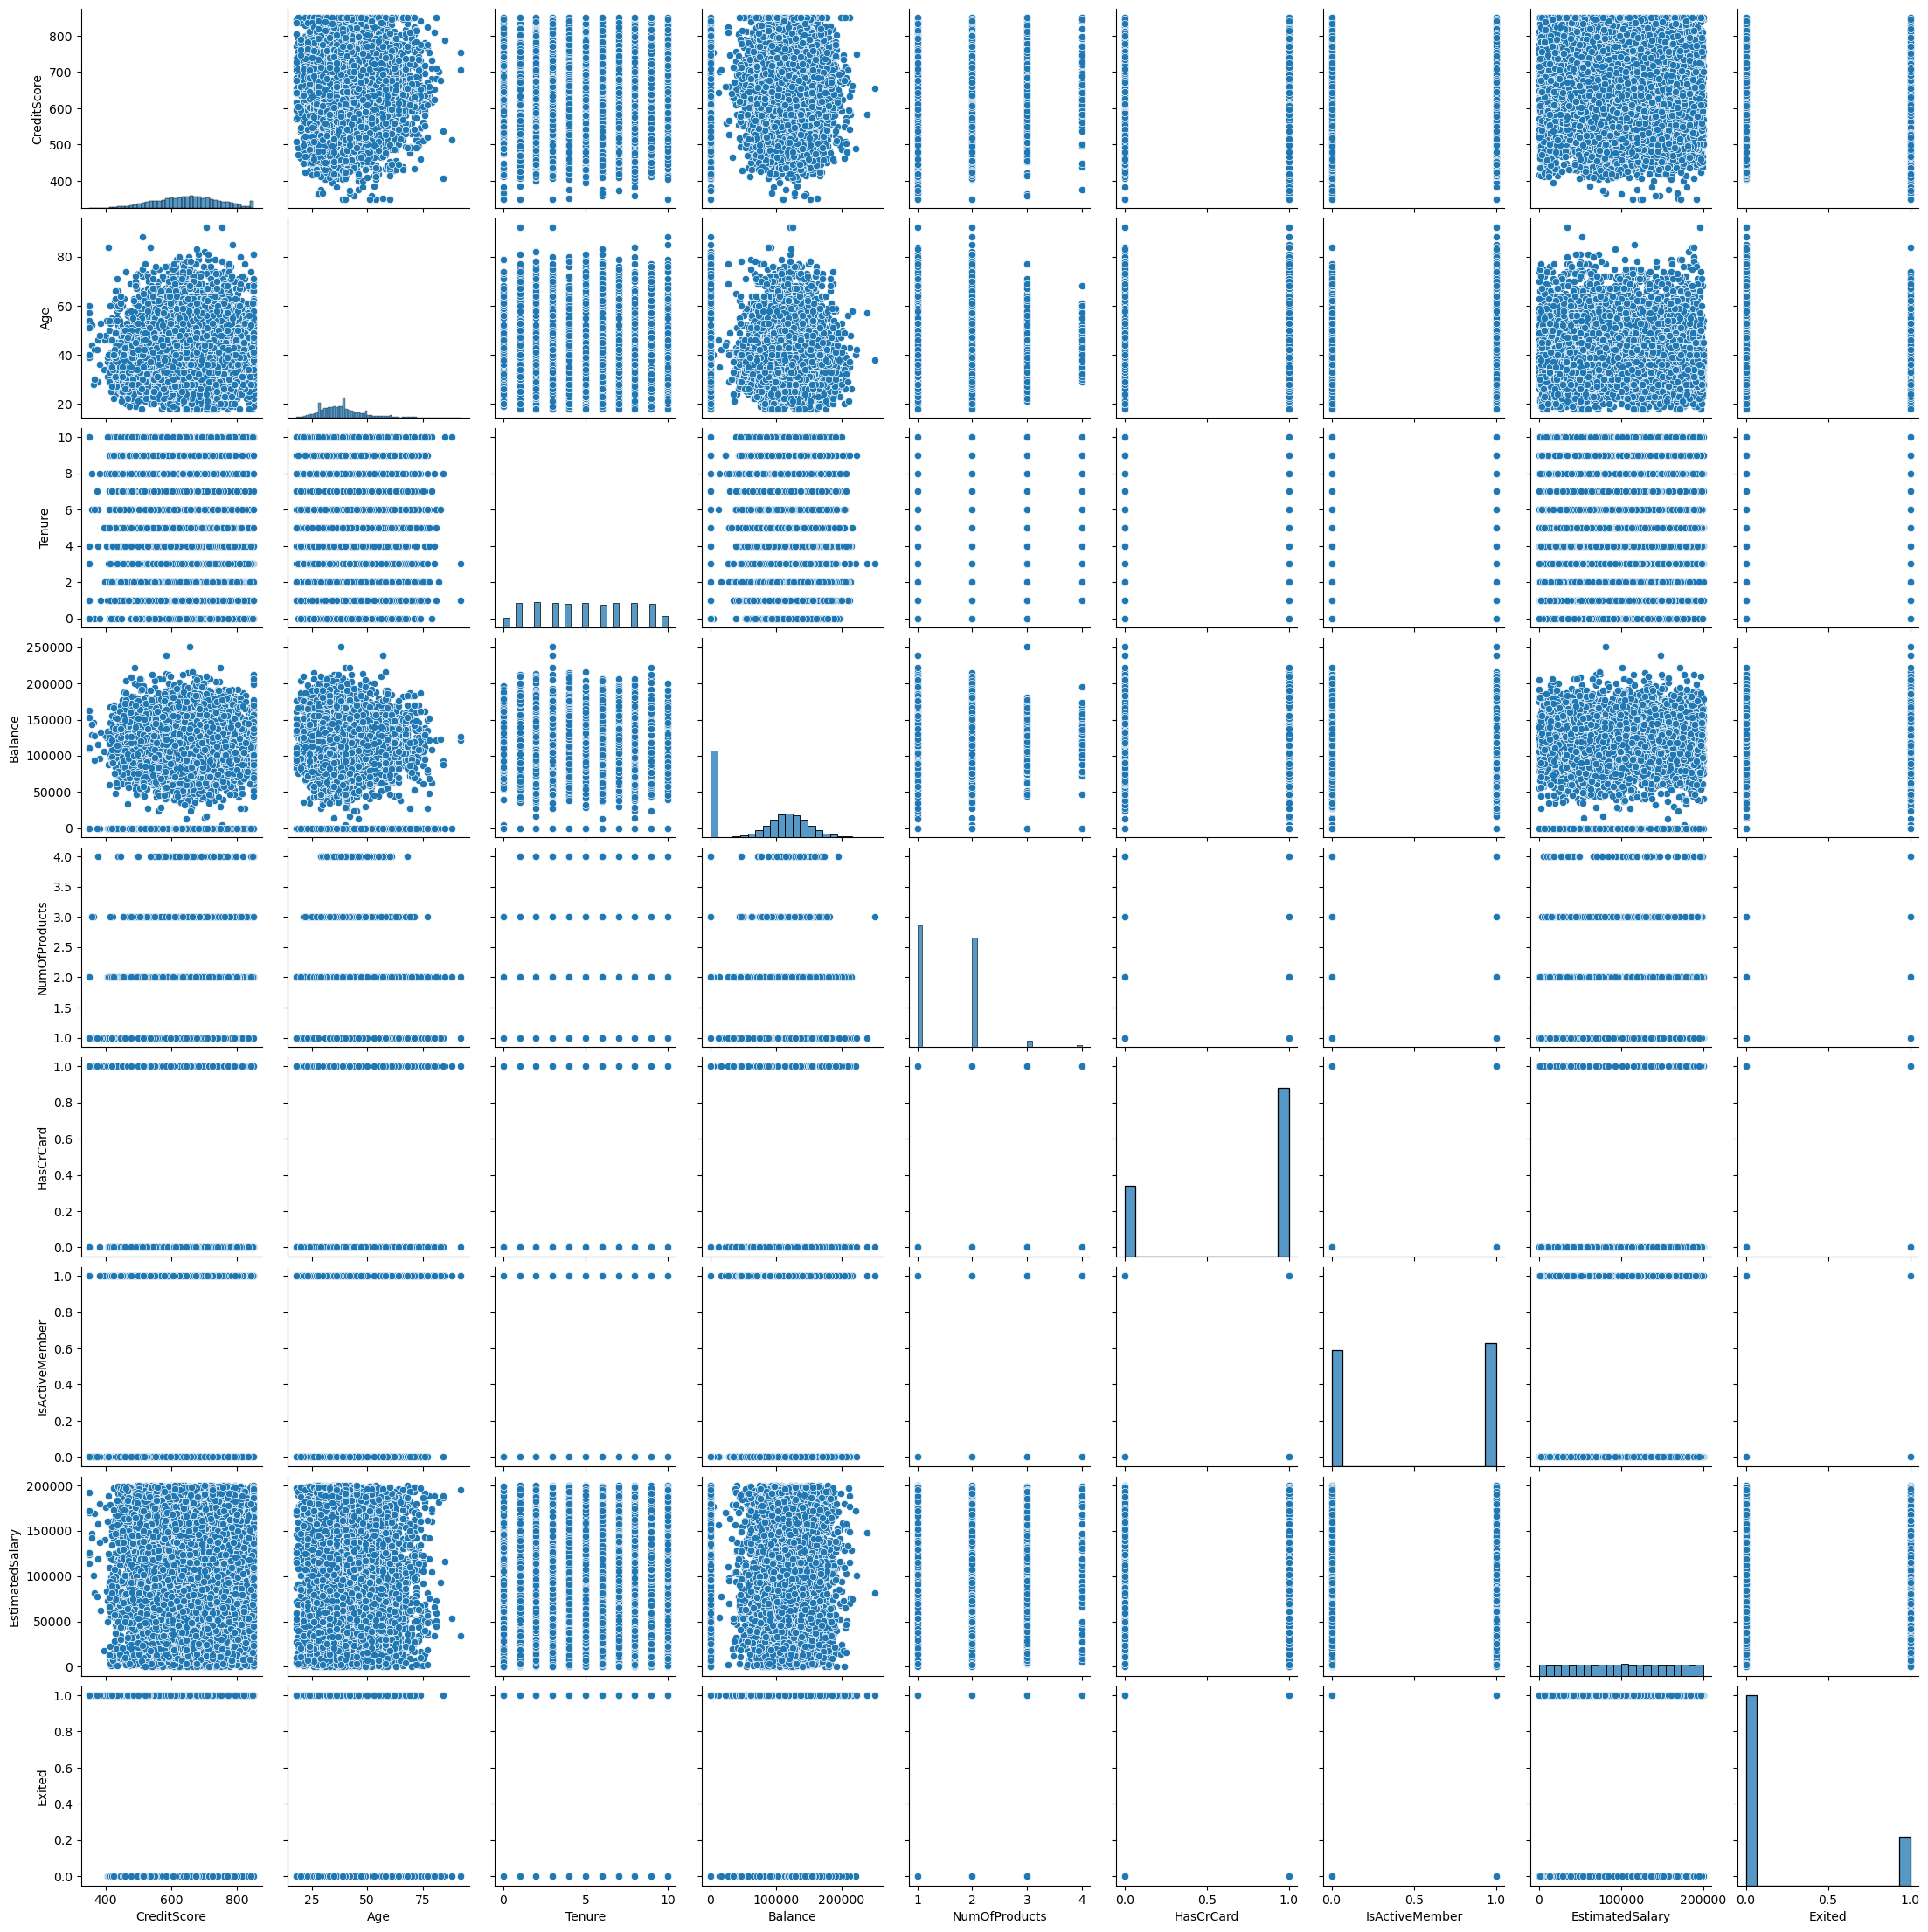

In [52]:
sns.pairplot(data=df)
plt.show()

In [92]:
df["Idgeography"]=df["Geography"].replace("France",0)
df["Idgeography"]=df["Idgeography"].replace("Spain",1)
df["Idgeography"]=df["Idgeography"].replace("Germany",2)

C:\Users\polin\AppData\Local\Temp\ipykernel_6420\1861996395.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Idgeography"]=df["Idgeography"].replace("Germany",2)


In [93]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Idgeography
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1


In [94]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Idgeography'],
      dtype='object')

In [100]:
df_corr=df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited','Idgeography']].corr()
df_corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Idgeography
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.008267
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.048092
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.001418
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.348700
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.006180
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.004036
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.012692
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.007382
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.153771
Idgeography,0.008267,0.048092,0.001418,0.348700,-0.006180,0.004036,-0.012692,0.007382,0.153771,1.000000


<Axes: >

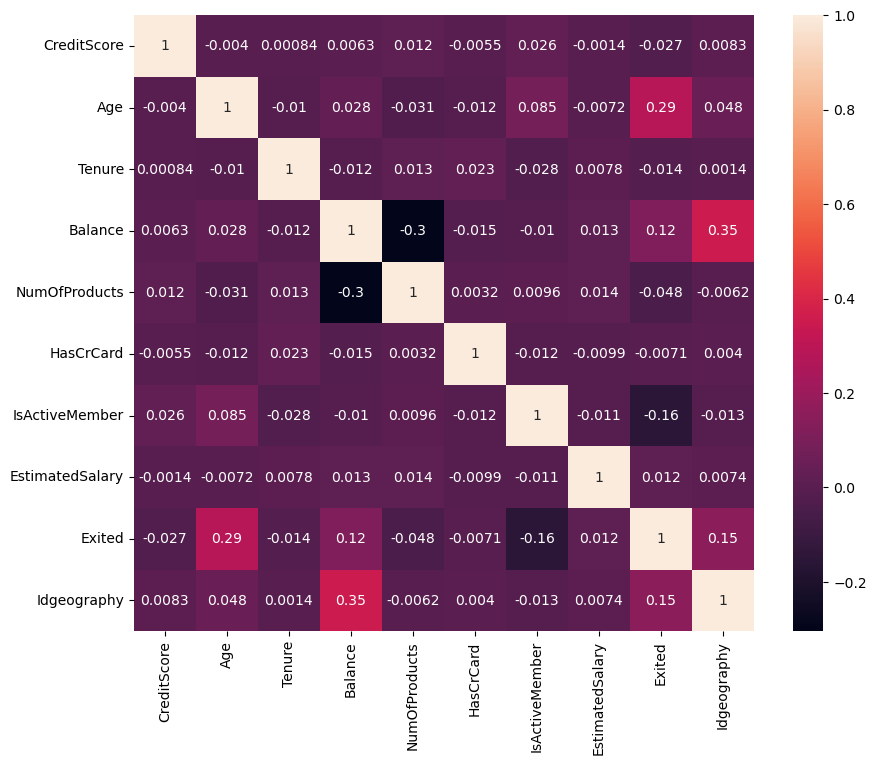

In [101]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True)

<Axes: xlabel='NumOfProducts', ylabel='Balance'>

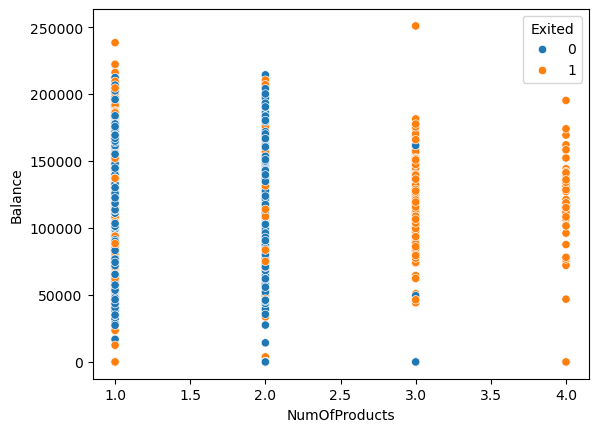

In [102]:
sns.scatterplot(data=df,x="NumOfProducts",y="Balance",hue="Exited")

<Axes: xlabel='Age', ylabel='Balance'>

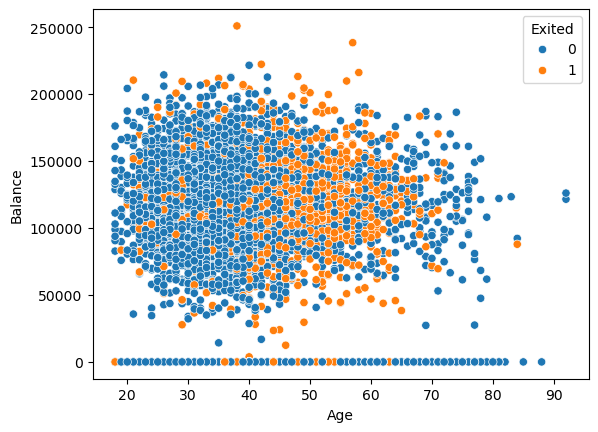

In [106]:
sns.scatterplot(data=df,x="Age",y="Balance",hue="Exited")

<Axes: xlabel='Age', ylabel='Balance'>

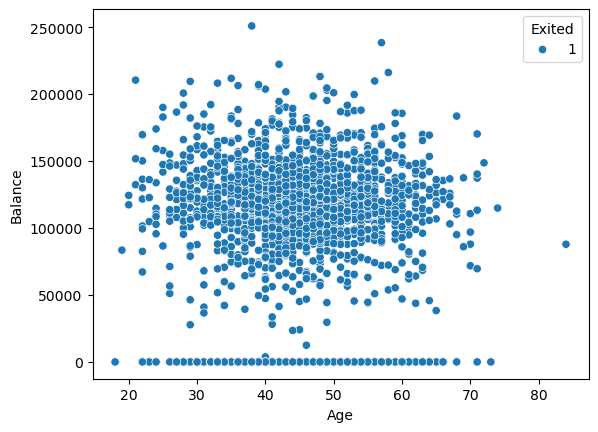

In [108]:
sns.scatterplot(data=df[df["Exited"]==1],x="Age",y="Balance",hue="Exited")